[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JamesMTucker/DATA_340_NLP/blob/master/Notebooks/Lecture_07_2023_02_16.ipynb)

# Lecture 07: Regular Expressions and Webscraping

## Lecture Overview

* Regular Expressions
* Webscraping
* API Usage
* Dataset Creation
* Assignment 2 and 3

<center><img src="https://imgs.xkcd.com/comics/regular_expressions.png"  width="600" height="600"></center>

## Regular Expressions: Taking quasi-structured data and making it structured

### What are Regular Expressions?

Regular expressions are a way to match patterns in text in the data type of a string. It takes some time to get used to reading regexes, but they are very powerful and can be used to extract pertinent information, clean up messy data, and/or format data for downstream analyses.

### A simple example

Let's say we have a string that contains a date in the format of `YYYY-MM-DD`. We want to extract the year, month, and day from this string. We can do this with the following regex:

In [1]:
import re

date = "2020-02-16"

# Extract the year, month, and day from the date string
year = re.findall(r"\d{4}", date)[0]
month = re.findall(r"\d{2}", date)[1]
day = re.findall(r"\d{2}", date)[2]

print(f'Year found: {year}\nMonth found: {month}\nDay found: {day}')

Year found: 2020
Month found: 20
Day found: 02


Notice that our expression is written relative to the string from which we want to extract. If our data was more complex, we would need to use more complex regexes. For example, if we wanted to extract the year, month, and day from a string that contained multiple dates, we would need to use a regex that looks like this: 


In [2]:
conversation_023 = """
On 2020-02-16, I had a conversation with my friend.
She was visiting family in Germany, so I had a hard time understanding the German phone number +49 30 901820.
I also had a conversation with my mother on 2020-02-17.
"""

# Extract the year, month, and day from the date string
year = re.findall(r"\d{4}", conversation_023)
month = re.findall(r"\d{2}", conversation_023)
day = re.findall(r"\d{2}", conversation_023)

print(year, month, day, sep="\n")

['2020', '9018', '2020']
['20', '20', '02', '16', '49', '30', '90', '18', '20', '20', '20', '02', '17']
['20', '20', '02', '16', '49', '30', '90', '18', '20', '20', '20', '02', '17']


So we need to have some familarity with our data to know how simple or complex our regex needs to be. Regexes can be very complex, as we can see here:

```Perl

my @matches;

say "Matched!" if m/
    (?(DEFINE)
        (?<QUOTE_MARK> ['"])
        (?<NOT_QUOTE_MARK> [^'"])
        (?<QUOTE>)
            (
                (?<quote>(?&QUOTE_MARK))
                (?:
                    (?&NOT_QUOTE_MARK)++
                    |
                    (?&QUOTE_MARK)
            )*
            \g{quote}
        )
        (?{ @{$^R}, = $^N}})
    )
    (?&QUOTE) (?( @matches = @{$^R} ) )
    /x;
```

Example from Brain D. Foy's [Mastering Regular Expressions](https://www.oreilly.com/library/view/mastering-regular-expressions/0596528124/)


### Regex syntax

Regexes are written in a special syntax that is different from the syntax of Python. The syntax is as follows:

* `.` matches any character
* `^` matches the beginning of the string
* `$` matches the end of the string
* `*` matches zero or more of the preceding character
* `+` matches one or more of the preceding character
* `?` matches zero or one of the preceding character
* `{n}` matches exactly n of the preceding character
* `{n,}` matches n or more of the preceding character
* `{,n}` matches 0 to n of the preceding character
* `{m,n}` matches at least m and at most n of the preceding character
* `[abc]` matches any character in the brackets
* `[^abc]` matches any character not in the brackets
* `|` matches either the preceding or the following character
* `()` groups the preceding match

### Regex functions

There are a few functions in Python that can be used to work with regexes. The most common are `re.search()` and `re.findall()`. `re.search()` will return the first match of a regex in a string. `re.findall()` will return all matches of a regex in a string. Let's look at an example of each using some sample data from the web:

In [3]:
import re
import requests
from bs4 import BeautifulSoup

# Get the HTML from the webpage
url = 'https://en.wikipedia.org/wiki/ISBN'
response = requests.get(url)
html = response.text

# Use BeautifulSoup to parse the HTML
soup = BeautifulSoup(html, 'lxml')

# Get the text from the HTML
text = soup.get_text()

# Use regex to find all the ISBNs in the text
regex = r'ISBN: [0-9-]+'
matches = re.findall(regex, text)
print(matches)

['ISBN: 0-345-24223-8']


Let'a take a look at this in more detail:

> An SBN may be converted to an ISBN by prefixing the digit "0". For example, the second edition of Mr. J. G. Reeder Returns, published by Hodder in 1965, has "SBN 340 01381 8", where "340" indicates the publisher, "01381" is the serial number assigned by the publisher, and "8" is the check digit. By prefixing a zero, this can be converted to ISBN 0-340-01381-8; the check digit does not need to be re-calculated. Some publishers, such as Ballantine Books, would sometimes use 12-digit SBNs where the last three digits indicated the price of the book;[12] for example, Woodstock Handmade Houses had a 12-digit Standard Book Number of 345-24223-8-595 (valid SBN: 345-24223-8, ISBN: 0-345-24223-8),[13] and it cost US$5.95.[14]


We can examine how this regex is working with the wonderful tool [Regex101](https://regex101.com/). And it's always best practice to consult the [Python documentation](https://docs.python.org/3/library/re.html) for more information about the `re` module.

## Web scraping: legalized data theft

"There is no glory in data." Something said to me by my MA thesis advisor.

<center><img src="../images/dss_abegg.png" height="400", width="800"></img></center>

Whereas the process of web scraping is not illegal, it is often frowned upon by the websites that you are scraping. It is important to be respectful of the websites that you are scraping and to make sure that you are not violating any terms of service. In addition, some websites will block your IP address if they want to prevent you from scraping their data. Web developers and web technologies can also be used to deter you from quick access from their data. For more information, see this [Join TechCrunch article](https://techcrunch.com/2022/04/18/web-scraping-legal-court/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAANzYrguMdHcwNL6AKW_UCTQORBn4CH1Idbtrp6YD-aNUv_Basl5x3ZyIgM54Z5bTbzuImyx5P0biFVkhswFoUQjUTRE-HDCFd_KOSGP1UT15q2N9JxZRYXBhjOkXJ1r7JDRlwm0fM4JVOeeJv6UfeuJGV3LFlKSn-UXMDWfP667p).

### Simple Scraping

Simple scraping is extracting data from websites that do not use the more advanced web technologies, such as JavaScript, databases, and/or APIs. These pages are often static webpages. We can use simple methods to extract such kind of data.

For example, we can use the `pandas` module to read in a table from a website. Let's look at an example:

In [5]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
# url = "https://en.wikipedia.org/wiki/Minnesota"

tables = pd.read_html(url)

tables[2]

Country/Territory UN region IMF[1][13]            World Bank[14]   
    Country/Territory UN region   Forecast       Year       Estimate   
0               World         —  105568776       2023      100562011  \
1       United States  Americas   26854599       2023       25462700   
2               China      Asia   19373586  [n 1]2023       17963171   
3               Japan      Asia    4409738       2023        4231141   
4             Germany    Europe    4308854       2023        4072192   
..                ...       ...        ...        ...            ...   
209          Anguilla  Americas          —          —              —   
210          Kiribati   Oceania        248       2023            223   
211             Nauru   Oceania        151       2023            151   
212        Montserrat  Americas          —          —              —   
213            Tuvalu   Oceania         65       2023             60   

               United Nations[15]             
          Year           Estimate       Year  
0         2022           96698005       2021  
1         2022           23315081       2021  
2    [n 3]2022           17734131  [n 1]2021  
3         2022            4940878       2021  
4         2022            4259935       2021  
..         ...                ...        ...  
209          —                303       2021  
210       2022                227       2021  
211       2022                155       2021  
212          —                 72       2021  
213       2022                 60       2021  

[214 rows x 8 columns]

### Medium Compexity Scraping

Medium complexity scraping is extracting data from websites that use hyperlinks to organize their data. These pages are often static webpages generated from Perl or PHP scripts. We will have to use more steps to accomplish our goal to build a dataset.

Two really import modules we can use are BeautifulSoup and Selenium. BeautifulSoup is a Python library for pulling data out of HTML and XML files. Selenium is a Python library that allows us to automate web browser interactions. We can use these two modules to scrape data from websites that use hyperlinks to organize their data.

* BeautifulSoup documentation: https://www.crummy.com/software/BeautifulSoup/bs4/doc/
* Selenium documentation: https://selenium-python.readthedocs.io/

In [6]:
# Let's look at a website HTML
import requests

url = "https://www.gutenberg.org/ebooks/search/?sort_order=downloads"

gutenberg_most_read = requests.get(url).text

In [7]:
gutenberg_most_read

"""
<!DOCTYPE html>\n<!--\n\nDON\'T USE THIS PAGE FOR SCRAPING.\n\nSeriously. You\'ll only get your IP blocked.\n\nDownload https://www.gutenberg.org/feeds/catalog.rdf.bz2 instead,\nwhich contains *all* Project Gutenberg metadata in one RDF/XML file.\n\n--><html lang="en">\n\n\n\n\n<head>\n<style>\n.
"""

'\n<!DOCTYPE html>\n<!--\n\nDON\'T USE THIS PAGE FOR SCRAPING.\n\nSeriously. You\'ll only get your IP blocked.\n\nDownload https://www.gutenberg.org/feeds/catalog.rdf.bz2 instead,\nwhich contains *all* Project Gutenberg metadata in one RDF/XML file.\n\n--><html lang="en">\n\n\n\n\n<head>\n<style>\n.\n'

In [8]:
## Let's download some books and store the file in our data directory
# ! wget https://www.gutenberg.org/cache/epub/feeds/rdf-files.tar.bz2

#### Let's look at the data

N.B.: The archive is a little over 1 GB. For the purpose of our course, I have extracted the first e-text from the archive. The file is called `pg1.rdf`. The file is in the `datasets` folder of this repository.

In [ ]:
# If you are running this notebook in Google colab, uncomment this line of code and run
# import re
# from bs4 import BeautifulSoup as bs4
#
# from pathlib import Path
# from google.colab import drive
# 
# drive.mount('/content/gdrive/', force_remount=True)
# file = Path('gdrive/MyDrive/DATA_340_3_NLP/Datasets/pg1.rdf')
# with open(file, 'r') as f:
#    gutenberg = f.read().decode('utf-8')
# gutenberg = bs4(gutenberg, features='lxml')

In [14]:
import re
from bs4 import BeautifulSoup as bs4

from pathlib import Path

file_name = 'pg1.rdf'
gutenberg_file = Path.cwd() / '..' / 'datasets' / file_name

# Read file and create a beautiful soup object
with open(gutenberg_file, "rb") as f:
    gutenberg = f.read().decode("utf-8")

# we need to use an XML parser
gutenberg = bs4(gutenberg, features="lxml")

print(gutenberg.prettify()[:1000])

<?xml version="1.0" encoding="utf-8"?>
<html>
 <body>
  <rdf:rdf xml:base="http://www.gutenberg.org/" xmlns:cc="http://web.resource.org/cc/" xmlns:dcam="http://purl.org/dc/dcam/" xmlns:dcterms="http://purl.org/dc/terms/" xmlns:pgterms="http://www.gutenberg.org/2009/pgterms/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#">
   <pgterms:ebook rdf:about="ebooks/1">
    <dcterms:publisher>
     Project Gutenberg
    </dcterms:publisher>
    <dcterms:license rdf:resource="license">
    </dcterms:license>
    <dcterms:issued rdf:datatype="http://www.w3.org/2001/XMLSchema#date">
     1971-12-01
    </dcterms:issued>
    <dcterms:rights>
     Public domain in the USA.
    </dcterms:rights>
    <pgterms:downloads rdf:datatype="http://www.w3.org/2001/XMLSchema#integer">
     1202
    </pgterms:downloads>
    <dcterms:creator>
     <pgterms:agent rdf:about="2009/agents/1638">
      <pgterms:name>
       Jefferson, Thomas
      </pgterms:n

/home/james/miniconda3/envs/pytorch/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


#### BeautifulSoup example

In [15]:
# Get the title of the book, description, and author
title = gutenberg.find("dcterms:title").text
description = gutenberg.find("dcterms:description").text
author = gutenberg.find("pgterms:agent").text

title, description, author

('The Declaration of Independence of the United States of America',
 'This is the original PG edition.\r\nSee also our revised edition: #16780\r\nSee also #300',
 '\nJefferson, Thomas\n1743\n1826\nUnited States President (1801-1809)\n\n')

In [16]:
# Let's get the link to the text
links = []

file_types = gutenberg.find_all("pgterms:file")
for f in file_types:
    if f["rdf:about"].endswith(".txt"):
        links.append(f["rdf:about"])

In [17]:
# Let's look at our links
links

['https://www.gutenberg.org/files/1/1-0.txt']

In [18]:
# Let's create another beautiful soup object for the text
text = bs4(requests.get(links[0]).text, features="lxml")

In [21]:
# display as HTML
from IPython.display import display, HTML

display(HTML(text.body.text[:1000]))

#### Data quality check and cleaning

It turns out the above is corpus of documents. Each document is headed by a date along with an e-text and number. Thankfully we know regular expressions, so we can use them to clean up the data and extract the e-texts.

In [22]:
data_check = re.findall(r"\[Etext #\d+\]", text.body.text)

In [23]:
data_check

['[Etext #1]',
 '[Etext #2]',
 '[Etext #3]',
 '[Etext #4]',
 '[Etext #5]',
 '[Etext #6]',
 '[Etext #7]',
 '[Etext #8]',
 '[Etext #9]']

### Higher Complexity Scraping with Selenium

Selenium enables us to automate web browser interactions. We can use Selenium to scrape data from websites that use JavaScript to generate their webpages. If we go the following website, we can see that the data is generated by JavaScript: https://osf.io/preprints/discover?subject=bepress%7CSocial%20and%20Behavioral%20Sciences%7CLinguistics. If we use the requests module to get the HTML of the page, we will not get the data we want.

In [25]:
## Example from preprints archive
## use requests to get the html
import requests

linguistics_preprints = "https://osf.io/preprints/discover?subject=bepress%7CSocial%20and%20Behavioral%20Sciences%7CLinguistics"

html = requests.get(linguistics_preprints)

if html.status_code == 200:
    linguistics_html_text = html.text
    
with open('preprints_wo_content.html', 'w') as html_out:
    html_out.write(linguistics_html_text)

How can we get the data from the loaded webpage?

In order to get the data from the loaded webpage, we need to use Selenium. Selenium is a Python library that allows us to automate web browser interactions. We can use Selenium to scrape data from websites that use JavaScript to generate their webpages. When we use Selenium, we need to use a web driver. A web driver is a program that allows Selenium to interact with a web browser. We can use the following web drivers:

* ChromeDriver
* EdgeDriver
* SafariDriver
* FirefoxDriver

In [31]:
## download the Chrome driver
# https://googlechromelabs.github.io/chrome-for-testing/#stable

! wget https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/117.0.5938.92/linux64/chrome-linux64.zip && unzip chrome_linux64.zip

--2023-09-21 15:25:18--  https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/117.0.5938.92/linux64/chrome-linux64.zip
Resolving edgedl.me.gvt1.com (edgedl.me.gvt1.com)... 2600:1900:4110:86f::, 34.104.35.123
Connecting to edgedl.me.gvt1.com (edgedl.me.gvt1.com)|2600:1900:4110:86f::|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146688753 (140M) [application/octet-stream]
Saving to: ‘chrome-linux64.zip.1’

chrome-linux64.zip. 100%[===================>] 139.89M  67.0MB/s    in 2.1s    

2023-09-21 15:25:21 (67.0 MB/s) - ‘chrome-linux64.zip.1’ saved [146688753/146688753]

unzip:  cannot find or open chrome_linux64.zip, chrome_linux64.zip.zip or chrome_linux64.zip.ZIP.


In [40]:
# Use Selenium to get the html
import time

from selenium import webdriver
from bs4 import BeautifulSoup as bs4

# Set the path to the Chrome drive
driver = webdriver.Chrome()

# Get the HTML from the webpage
driver.get(linguistics_preprints)
time.sleep(10)

with open('preprints_w_content.html', 'w') as html_out:
    html_out.write(driver.page_source)

html_source = driver.page_source

driver.close()

In [41]:
# Let's use the beautiful soup object to parse the html and extract all the h4 tags
soup = bs4(html_source, "lxml")

# Use soup to find all the h4 tags
articles = soup.find_all("h4")

In [42]:
articles

[<h4>Active Filters:</h4>,
 <h4>Refine your search by</h4>,
 <h4>
 <a href="https://thesiscommons.org/36xk8/">
                             Imagined Interdependence: Manipulating Discourse Changes How People Construe Interdependence
                         </a>
 <!-- --> </h4>,
 <h4>
 <a class="ember-view" href="/6w2se" id="ember1298">                        The N400's 3 As: Association, Automaticity, Attenuation (and Some Semantics Too)
 </a><!-- --> </h4>,
 <h4>
 <a href="https://psyarxiv.com/dymc8/">
                             Learning distributions as they come: Particle filter models for online distributional learning of phonetic categories
                         </a>
 <!-- --> </h4>,
 <h4>
 <a href="https://psyarxiv.com/hy42g/">
                             Look before you speak: Children’s integration of visual information into informative referring expressions.
                         </a>
 <!-- --> </h4>,
 <h4>
 <a href="https://psyarxiv.com/7ywzd/">
                    

### Extract data from the website

In [43]:
# Strip the text from the h4 tags
entries = [a.text.strip() for a in articles]

# Strip the hyperlinks from the h4 tags
links = [a.find("a") for a in articles]

In [44]:
entries, links

(['Active Filters:',
  'Refine your search by',
  'Imagined Interdependence: Manipulating Discourse Changes How People Construe Interdependence',
  "The N400's 3 As: Association, Automaticity, Attenuation (and Some Semantics Too)",
  'Learning distributions as they come: Particle filter models for online distributional learning of phonetic categories',
  'Look before you speak: Children’s integration of visual information into informative referring expressions.',
  'Making predictable unpredictable with style – Behavioral and electrophysiological evidence for the critical role of prosodic expectations in the perception of prominence in speech',
  'The Use of Code Switching by Lecturers in Teaching Process at University of Muhammadiyah Sorong',
  'Differences in the Emotional Content in Different Bible Translations',
  'How to Create Shared Symbols',
  'The multiplex structure of the mental lexicon influences picture naming in people with aphasia',
  'Semantic consistency of actions inf

<Axes: xlabel='Year'>

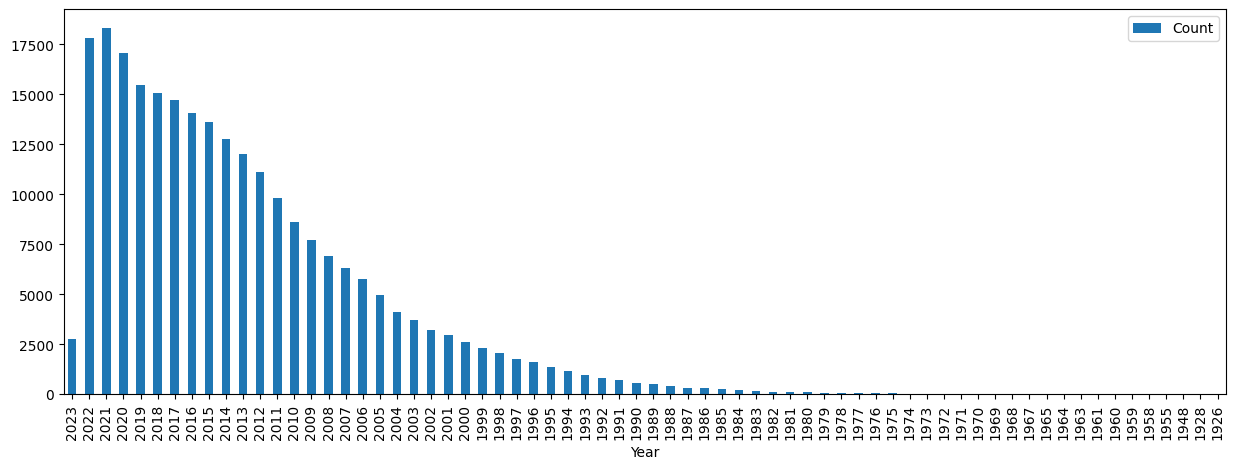

In [46]:
import pandas as pd

# our query results for `little is known` in PubMed
df = pd.read_csv('../datasets/pubmed_little.csv')
df.plot(kind='bar', x='Year', y='Count', figsize=(15, 5))

#### Understanding our API

The National Center for Biotechnology Information [NCBI] documents the PubMed API at: https://www.ncbi.nlm.nih.gov/home/develop/api/

#### Let's use the API to get varios kinds of data related to each Publication (PMID)

In [47]:
import requests
from lxml import html


# let's store the base url for the PubMed API
pubmed_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&retmode=xml&id={}"


# Let's get the list of PubMed IDs
PMID = 18652081

# Format the url
our_pmid = pubmed_url.format(PMID)

# Let's take a look at the PMID
our_pmid

'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&retmode=xml&id=18652081'

In [48]:
# Let's take the title and abstract
response = requests.get(our_pmid)
pmid_data = html.fromstring(response.content)

pmid_data

<Element pubmedarticleset at 0x7fd97855f0b0>

In [49]:
# We have to do some extra work to get the data we want
title = " ".join([title.text for title in pmid_data.xpath("//articletitle")])
abstract = "||||".join([line.text for line in pmid_data.xpath("//abstract/abstracttext")])

In [50]:
title, abstract

('Pharmacokinetics of creatine.',
 'Research has demonstrated that creatine supplementation has some therapeutic benefit with respect to muscle function and more recently neurological function. Despite the growing body of literature on the pharmacologic effect of creatine, very little is known about the disposition of creatine after supraphysiologic doses. The movement of creatine throughout the body is governed by transport processes which impact the absorption of creatine from the intestine, clearance of creatine from the kidney, and access of creatine to target tissues. With repeated doses of creatine, it appears that the clearance of creatine decreases mainly due to the saturation of skeletal muscle stores. Insulin and insulin-stimulating foods appear to enhance muscle uptake of creatine but at the same time, high carbohydrate meals may slow the absorption of creatine from the intestine. Little is known about creatine disposition in special populations including the elderly and pat

## Dataset Creation

From [Grimmer et al.](./course_readings/Grimmer-Grimmer_48-62.pdf):

* Principle 1: Data should be collected in a way that is consistent with the research question.
    * Usefulness depends on the question to be answered
    * Revision: usefulness depends on the creativity of the researcher
* Principle 2: Data should be collected in a way that is consistent with the research design.
    * No values free corpus construction
    * This is in my opinion the most important principle
* Principle 3: Data should be collected in a way that is consistent with the research context.
    * There is no `right` way to represent a text but there are considerations
    * Follow the insights and conventions of the statstical community
* Principle 4: Data should be collected in a way that is consistent with the research ethics.
    * Privacy, consent, and anonymity
    * Data equally representative of the population - sampling
    * Conclusions should be validated by measurements of science and not by the researcher's intuition
* Principle 5: Code and results should be reproducable (the curious case of _Arming America_ by Michael Bellesiles; won Bancroft Prize. His thesis that the second ammendment was not about personal ownership of guns, as evidenced by probate records. He was later found to have fabricated his data.)